# Heart Disease ML Pipeline

## Refrences

https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning/notebook

https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning/notebook

https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning

https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning/notebook

In [1]:
## Import all the libraries
import numpy as np
import pandas as pd
#from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import *
from hummingbird.ml import convert, load


## Import the Data

In this part we just import all the data.

In [2]:
## Load the data
df = pd.read_csv(r"C:\Users\abdul\Downloads\heart_disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Visualisation

### Total number of Sick & Healthy People

This shows the total number of sick and healthy people.

In [3]:
## Make graphs all this is pretty self explanatory
have_disease=(df.target==1).sum()
print('Number of people with disease is', have_disease, ' or {:.2f}% '.format(have_disease/df.target.count()*100))
dont_have_disease=(df.target==0).sum()
print('Number of people who dont have disease is',dont_have_disease,' or {:.2f}% '.format(dont_have_disease/df.target.count()*100))

Number of people with disease is 165  or 54.46% 
Number of people who dont have disease is 138  or 45.54% 


Shows the graph.

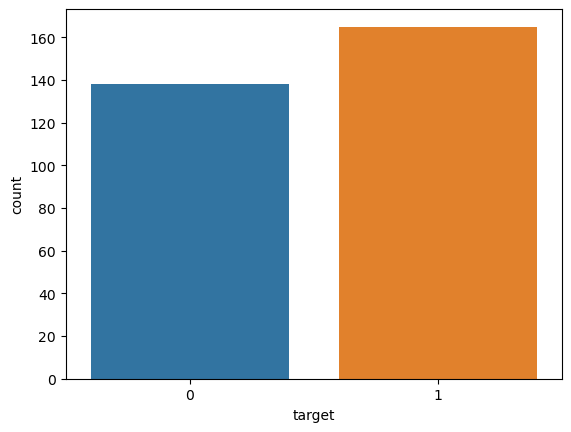

In [4]:
sns.countplot(x="target", data=df)
plt.show()

### Total Number of Males and Females in the data

This shows total number of males and females.

In [5]:
male=(df.sex==1).sum()
print('Out of all the patients there are ',male,'Males or {:.2f}%'.format(male/df.sex.count()*100))
female=(df.sex==0).sum()
print('Out of all the patients there are ',female,'females or {:.2f}%'.format(female/df.sex.count()*100))

Out of all the patients there are  207 Males or 68.32%
Out of all the patients there are  96 females or 31.68%


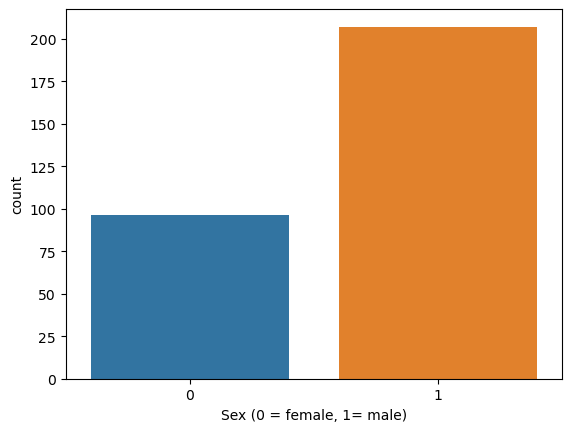

In [6]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

### Data about Helathy and Sick People

This shows characterstics about healthy and sick people.

In [7]:
df.groupby('target').mean().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.6,0.83,0.48,134.4,251.09,0.16,0.45,139.10,0.55,1.59,1.17,1.17,2.54
1,52.5,0.56,1.38,129.3,242.23,0.14,0.59,158.47,0.14,0.58,1.59,0.36,2.12


### Heart Disease and Ages

This shows number of healthy and sick people according to their ages.

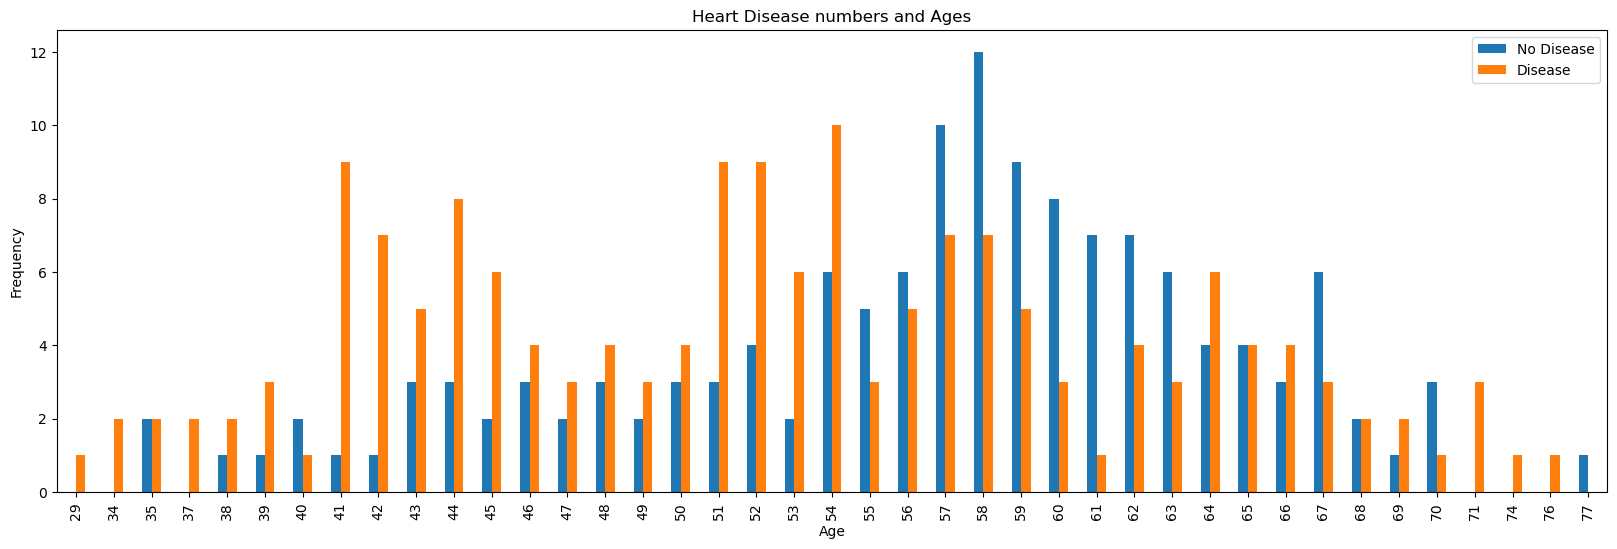

In [8]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease numbers and Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.show()

### How many Males and Females have heart disease?

This shows how many males and females are sick or healthy

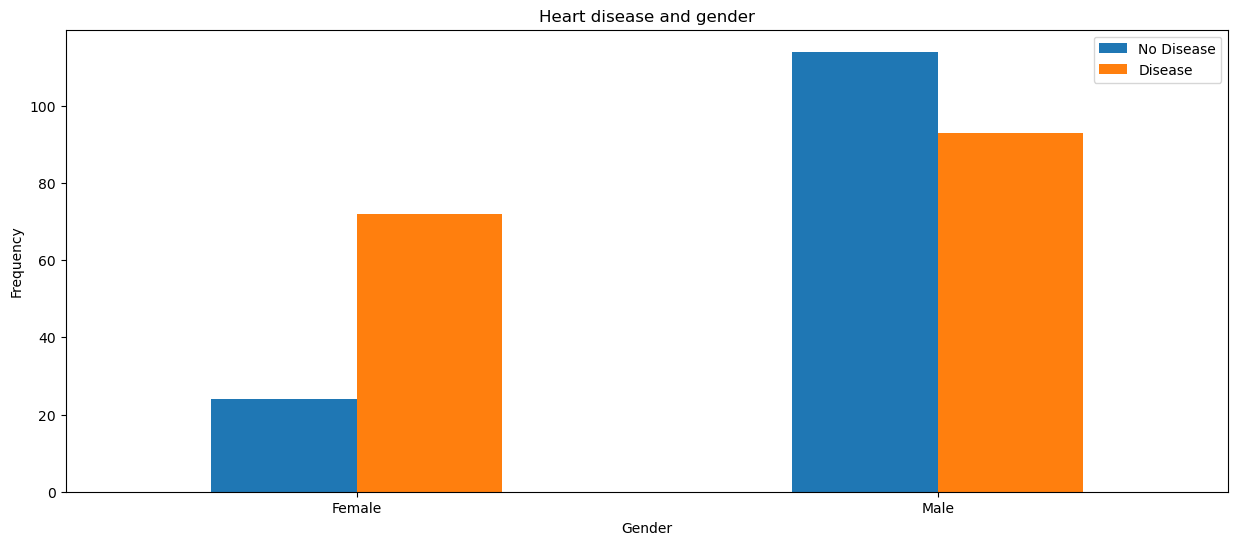

In [9]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(15,6))
plt.xticks(np.arange(2), ('Female','Male'))
plt.xticks(rotation=0)
plt.title('Heart disease and gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.show()

### Types of Angina and its Relation with Heart Disease

This shows types of Angina and its Relation with Heart Disease

In [10]:
typical_angina=(df.cp==0).sum()
atypical_angina=(df.cp==1).sum()
non_anginal_pain=(df.cp==2).sum()
asymptomatic=(df.cp==3).sum()
print('People with typical angina =',typical_angina)
print('People with atypical angina =',atypical_angina)
print('People with non anginal pain =',non_anginal_pain)
print('People with asymptomatic =',asymptomatic)

People with typical angina = 143
People with atypical angina = 50
People with non anginal pain = 87
People with asymptomatic = 23


#### In terms of Gender

This shows types of angina across different genders.

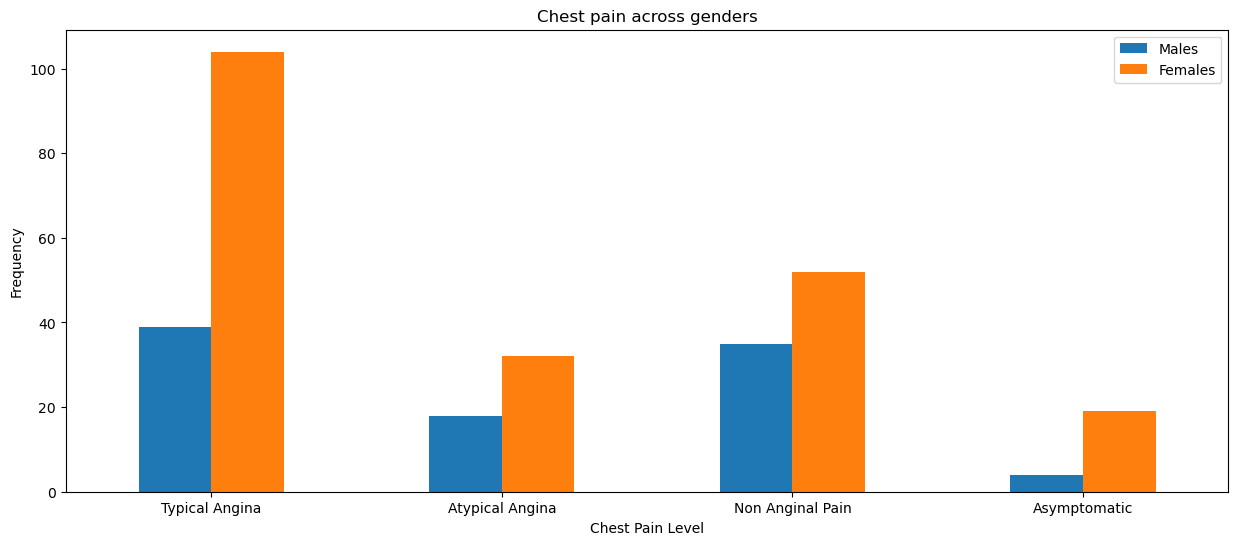

In [11]:
pd.crosstab(df.cp,df.sex).plot(kind='bar',figsize=(15,6))
plt.title('Chest pain across genders')
plt.xticks(np.arange(4), ('Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'))
plt.xlabel('Chest Pain Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Males', 'Females'])
plt.show()

#### In terms of Disease Numbers

This shows types of angine across sick and healthy people.

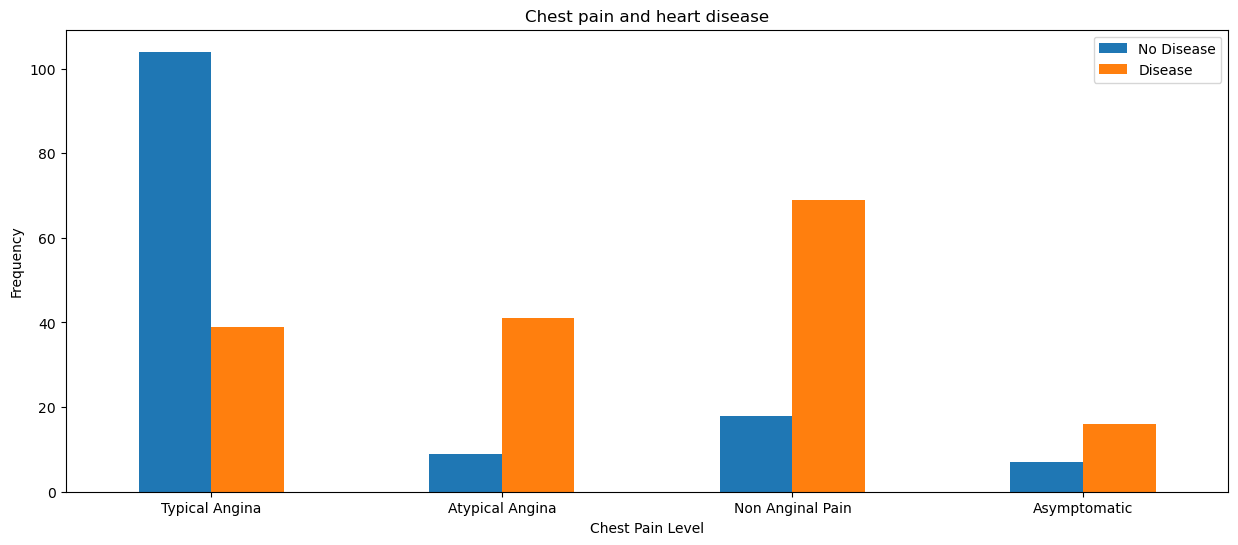

In [12]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(15,6))
plt.title('Chest pain and heart disease')
plt.xticks(np.arange(4), ('Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'))
plt.xlabel('Chest Pain Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])
plt.show()

### ECG Slope and Heart Disease

This shows ECG slope and its relation with heart diseases.

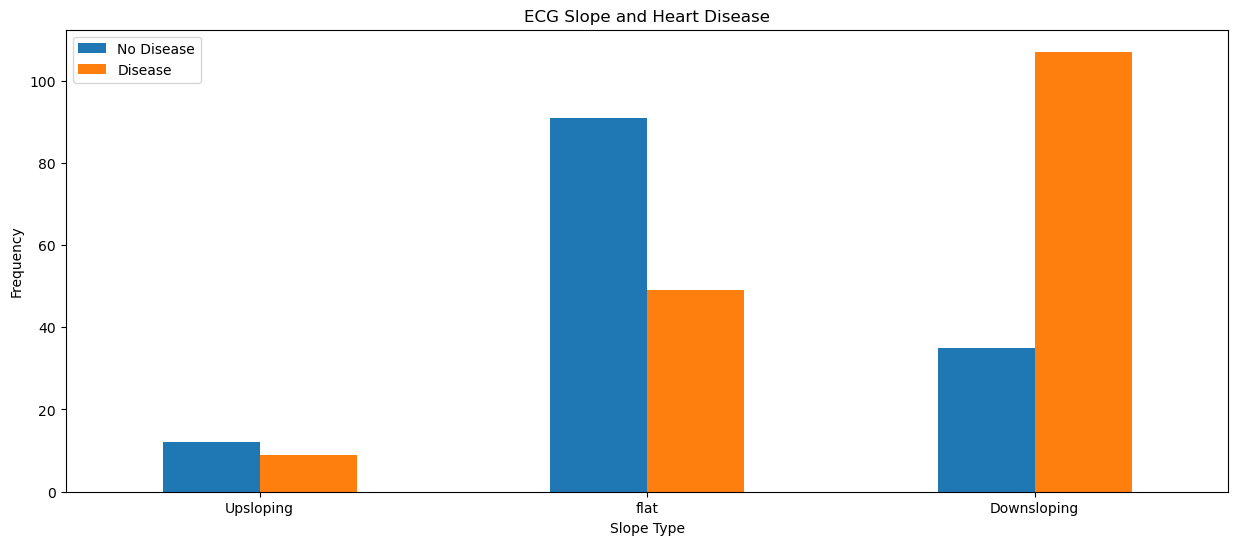

In [13]:
pd.crosstab(df.slope,df.target).plot(kind='bar',figsize=(15,6))
plt.title('ECG Slope and Heart Disease')
plt.xticks(np.arange(3), ('Upsloping','flat','Downsloping'))
plt.xlabel('Slope Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])
plt.show()

### Fasting Blood Sugar and Heart Disease

This shows blood sugar and its relation with heart diseases.

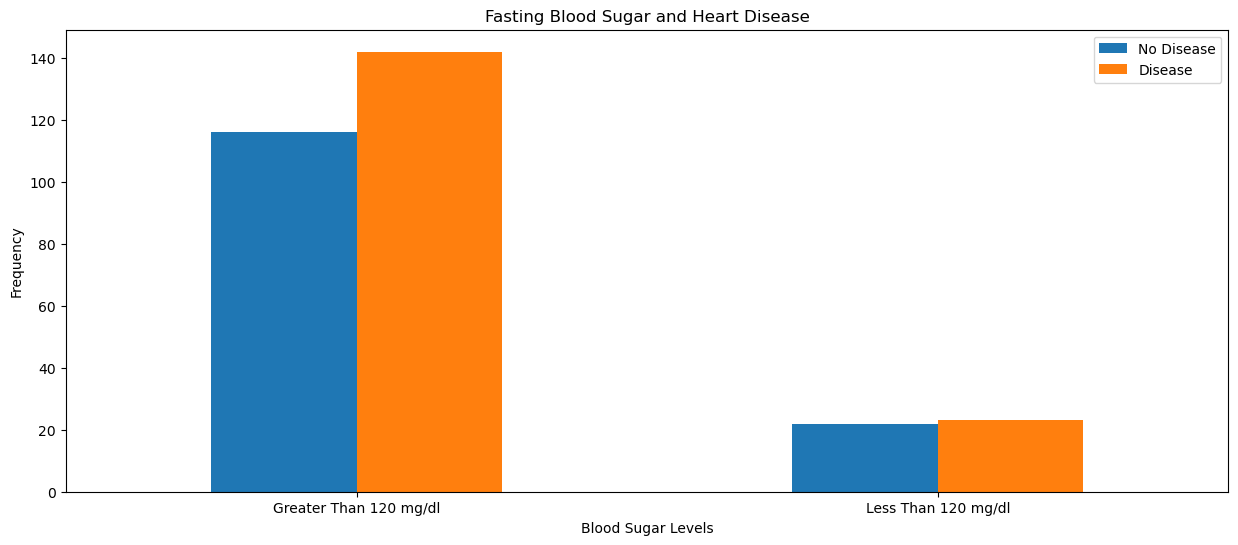

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind='bar',figsize=(15,6))
plt.title('Fasting Blood Sugar and Heart Disease')
plt.xticks(np.arange(2), ('Greater Than 120 mg/dl','Less Than 120 mg/dl'))
plt.xlabel('Blood Sugar Levels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])
plt.show()

### Exercise Induced Angina and Heart Disease

This shows Exercise Induced Angina and its relation with heart diseases.

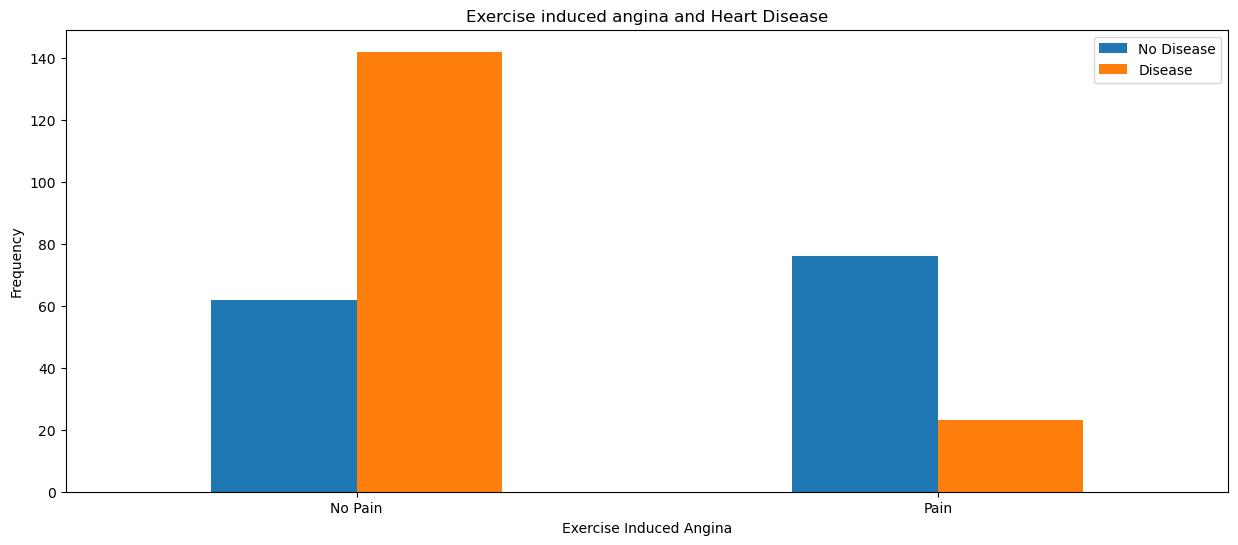

In [15]:
pd.crosstab(df.exang,df.target).plot(kind='bar',figsize=(15,6))
plt.title('Exercise induced angina and Heart Disease')
plt.xticks(np.arange(2), ('No Pain','Pain'))
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])
plt.show()

### Resting ECG and Heart Disease

This shows Resting ECG and its relation with heart diseases.

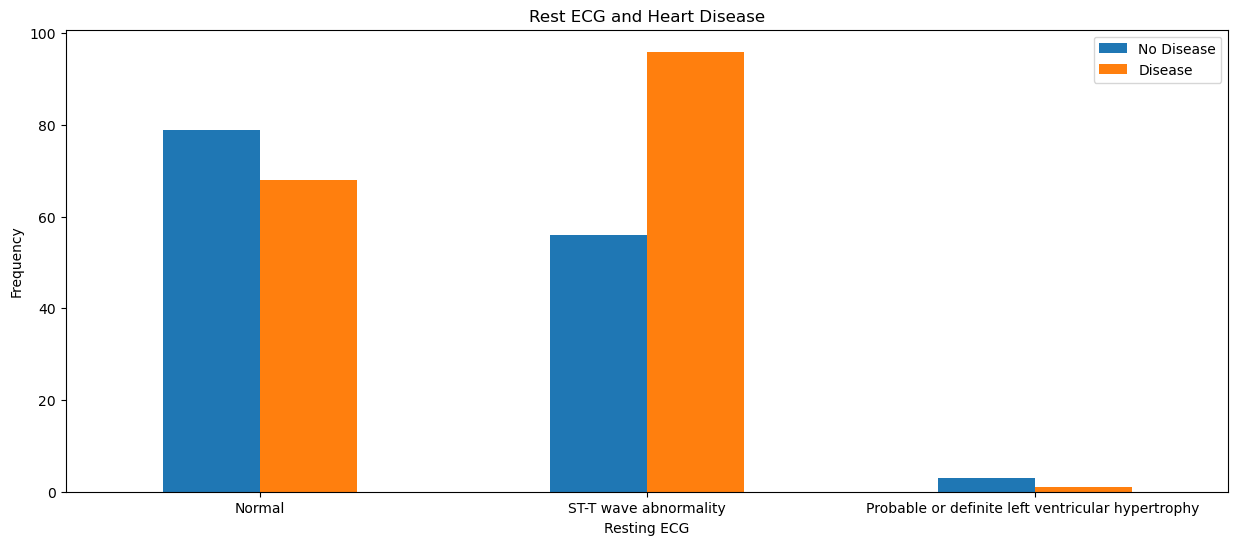

In [16]:
pd.crosstab(df.restecg,df.target).plot(kind='bar',figsize=(15,6))
plt.title('Rest ECG and Heart Disease')
plt.xticks(np.arange(3), ('Normal','ST-T wave abnormality','Probable or definite left ventricular hypertrophy '))
plt.xlabel('Resting ECG')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])
plt.show()

# Data Preprocessing

## Creating Dummy Values and Putting them in the Data Frame

In [17]:
## Create dummy values
Dum_CP = pd.get_dummies(df['cp'], prefix = "cp")
Dum_Thal = pd.get_dummies(df['thal'], prefix = "thal")
Dum_Slope = pd.get_dummies(df['slope'], prefix = "slope")
Dum_Sex = pd.get_dummies(df['sex'], prefix = "sex")
Dum_Fbs = pd.get_dummies(df['fbs'], prefix = "fbs")
Dum_Exang = pd.get_dummies(df['exang'], prefix = "exang")
Dum_ca = pd.get_dummies(df['ca'], prefix = "ca")
Dum_Restecg = pd.get_dummies(df['restecg'], prefix = "restecg")
frames = [df, Dum_CP, Dum_Thal, Dum_Slope,Dum_Sex,Dum_Fbs,Dum_Exang,Dum_ca,Dum_Restecg]
df = pd.concat(frames, axis = 1)
## Drop Unwanted ones
df = df.drop(columns = ['cp', 'thal', 'slope','sex','fbs','exang','ca','restecg'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,...,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2
0,63,145,233,150,2.3,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,56,120,236,178,0.8,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## Performing StandardScaler On the Data frame

In [18]:
## Perform Standardization
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
cts = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
df[cts] = s_sc.fit_transform(df[cts])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,...,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [19]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'slope_0', 'slope_1', 'slope_2', 'sex_0', 'sex_1', 'fbs_0', 'fbs_1',
       'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'restecg_0', 'restecg_1', 'restecg_2'],
      dtype='object')

## Splitting the data for Training and Testing

In [20]:
y = df.target.values
x = df.drop(['target'], axis = 1)

In [21]:
## Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=44)

# Training Models

### DecisionTreeClassifier

In [22]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc1 = dtc.score(x_test, y_test)*100
print("Decision Tree Testing Accuracy {:.2f}%".format(acc1))

Decision Tree Testing Accuracy 76.92%


In [23]:
results_df_Pre_Opt= pd.DataFrame(data=[["DecisionTreeClassifier", acc1]], columns=['Model', 'Testing Accuracy %'])

### RandomForestClassifier

In [24]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
rf.fit(x_train, y_train)
acc2 = rf.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc2))


Random Forest Algorithm Accuracy Score : 81.32%


In [25]:
results_df2 = pd.DataFrame(data=[["RandomForestClassifier", acc2]], columns=['Model', 'Testing Accuracy %'])
results_df_Pre_Opt = results_df_Pre_Opt.append(results_df2, ignore_index=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18512\3815917980.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_Pre_Opt = results_df_Pre_Opt.append(results_df2, ignore_index=True)


### Support Vector Machine

In [26]:
# SVM Classification
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
acc3 = svm.score(x_test,y_test)*100
print("SVM Algorithm Accuracy Score: {:.2f}%".format(acc3))

Test Accuracy of SVM Algorithm: 83.52%


In [27]:
results_df2 = pd.DataFrame(data=[["Support Vector Machine", acc3]], columns=['Model', 'Testing Accuracy %'])
results_df_Pre_Opt = results_df_Pre_Opt.append(results_df2, ignore_index=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18512\2862951629.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_Pre_Opt = results_df_Pre_Opt.append(results_df2, ignore_index=True)


## Predicting Values

In [28]:
# Predicted values
y_pred_svm = svm.predict(x_test)
y_pred_dtc = dtc.predict(x_test)
y_pred_rf = rf.predict(x_test)

### Random Forest Prediction

In [29]:
y_pred_rf0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_rf } )
y_pred_rf0.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1


### Decision Tree Prediction

In [30]:
y_pred_dtc0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_dtc } )
y_pred_dtc0.head()

,Actual,Predicted
0,1,0
1,1,0
2,0,0
3,0,0
4,1,1


### Support Vector Machine Prediction

In [31]:
y_pred_svm0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_svm } )
y_pred_svm0.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1


## Testing Accuracy before Hyper Parameter Tuning

In [32]:
results_df_Pre_Opt

,Model,Testing Accuracy %
0,DecisionTreeClassifier,76.923077
1,RandomForestClassifier,81.318681
2,Support Vector Machine,83.516484


## Confusion Matrix

In [33]:
## Make confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
cm_rf = confusion_matrix(y_test,y_pred_rf)

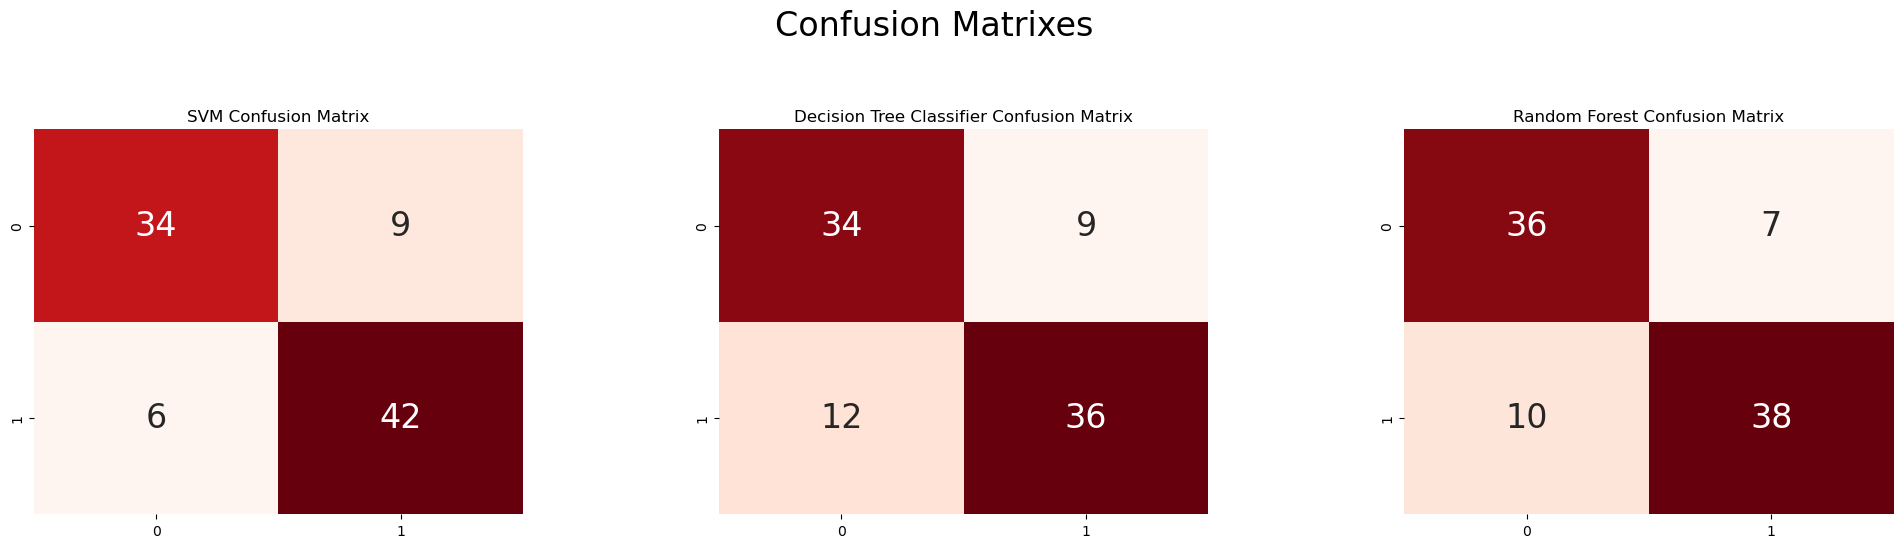

In [34]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Hyper Parameter Tuning

### Decision Tree Hyper Parameter Tuning

In [35]:
# Help taken from https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning/notebook#%F0%9F%A4%96-Models-Hyperparameter-Tuning
## Declare parameters
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }
dtc_cv = GridSearchCV(dtc, params, n_jobs=-1, verbose=1, cv=3)
dtc_cv.fit(x_train, y_train)
best_params = dtc_cv.best_params_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [36]:
## Train Model
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(x_train, y_train)
acc4 = dtc.score(x_test, y_test)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc4))

Decision Tree Test Accuracy 81.32%


In [37]:
results_df_Post_Opt= pd.DataFrame(data=[["DecisionTreeClassifier", acc4]], columns=['Model', 'Testing Accuracy %'])

### Random Forest Hyper Parameter Tuning

In [38]:
# Help taken From https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning
## Declare parameters
n_estimators = [50,100,200,500,600,700,800,2000,5000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, 20, 25, 50, 100, 200, 400, None]
min_samples_split = [2, 5, 10, 15, 20, 40, 80, 120]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

from sklearn.model_selection import GridSearchCV
rf_random = GridSearchCV(rf, params_grid, cv = 2, verbose=2, n_jobs = -1)
rf_random.fit(x_train, y_train)
best_params = rf_random.best_params_

Fitting 2 folds for each of 19008 candidates, totalling 38016 fits


In [39]:
## Train Model
rf = RandomForestClassifier(**best_params) 
rf.fit( x_train, y_train)
acc5 = rf.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.5f}%".format(acc5))

Random Forest Algorithm Accuracy Score : 84.61538%


In [40]:
results_df2 = pd.DataFrame(data=[["RandomForestClassifier", acc5]], columns=['Model', 'Testing Accuracy %'])
results_df_Post_Opt = results_df_Post_Opt.append(results_df2, ignore_index=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18512\318415860.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_Post_Opt = results_df_Post_Opt.append(results_df2, ignore_index=True)


### Support Vector Machine Hyper Parameter Tuning

In [41]:
## Took help from https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning
## Declare parameters
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm, params, n_jobs=-1, cv=5, verbose=1,)
svm_cv.fit(x_train, y_train)
best_params = svm_cv.best_params_

Fitting 5 folds for each of 147 candidates, totalling 735 fits


In [42]:
## Train Parameters
svm = SVC(**best_params)
svm.fit(x_train, y_train)
acc6 = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.5f}%".format(acc6))

Test Accuracy of SVM Algorithm: 85.71429%


In [43]:
results_df2 = pd.DataFrame(data=[["Support Vector Machine", acc6]], columns=['Model', 'Testing Accuracy %'])
results_df_Post_Opt = results_df_Post_Opt.append(results_df2, ignore_index=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18512\1991511788.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_Post_Opt = results_df_Post_Opt.append(results_df2, ignore_index=True)


## Predicting Values

In [56]:
# Predicted values
y_pred_svm = svm.predict(x_test)
y_pred_dtc = dtc.predict(x_test)
y_pred_rf = rf.predict(x_test)

### Random Forest Prediction After Tuning

In [57]:
y_pred_rf0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_rf } )
y_pred_rf0.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1


### Decision Tree Prediction After Tuning

In [58]:
y_pred_dtc0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_dtc } )
y_pred_dtc0.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1


### Support Vector Machine Prediction After Tuning

In [59]:
y_pred_svm0 = pd.DataFrame( { "Actual": y_test,  "Predicted": y_pred_svm } )
y_pred_svm0.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1


# Results

## Testing Accuracy before Hyper Parameter Tuning

In [49]:
results_df_Pre_Opt

,Model,Testing Accuracy %
0,DecisionTreeClassifier,76.923077
1,RandomForestClassifier,81.318681
2,Support Vector Machine,83.516484


## Testing Accuracy after Hyper Parameter Tuning

In [48]:
results_df_Post_Opt

,Model,Testing Accuracy %
0,DecisionTreeClassifier,81.318681
1,RandomForestClassifier,84.615385
2,Support Vector Machine,85.714286


## Confusion Matrix

In [50]:
## Make confusion Matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
cm_rf = confusion_matrix(y_test,y_pred_rf)

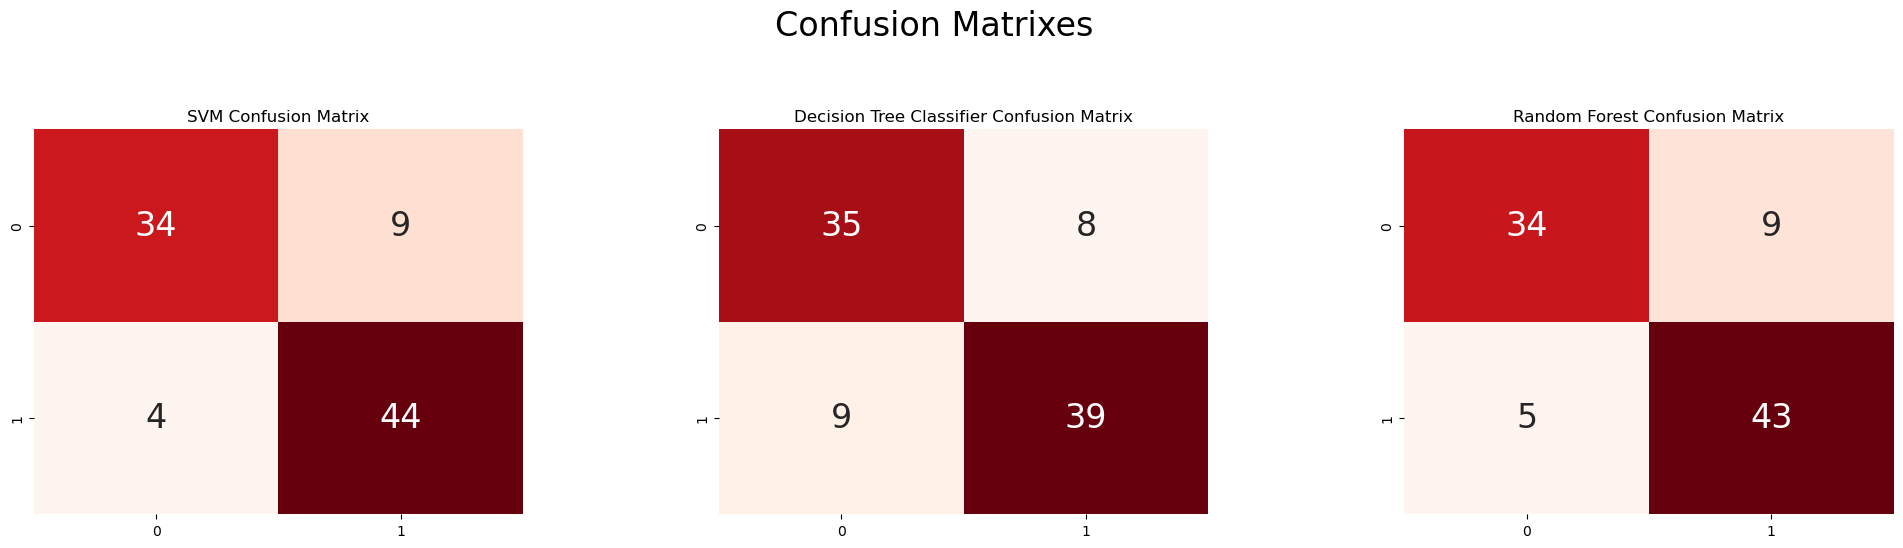

In [51]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Most Important Features

In [52]:
### Took help from https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning/notebook
## Extract Most Imp Features
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

### Most important features according to Random Forest

<AxesSubplot:>

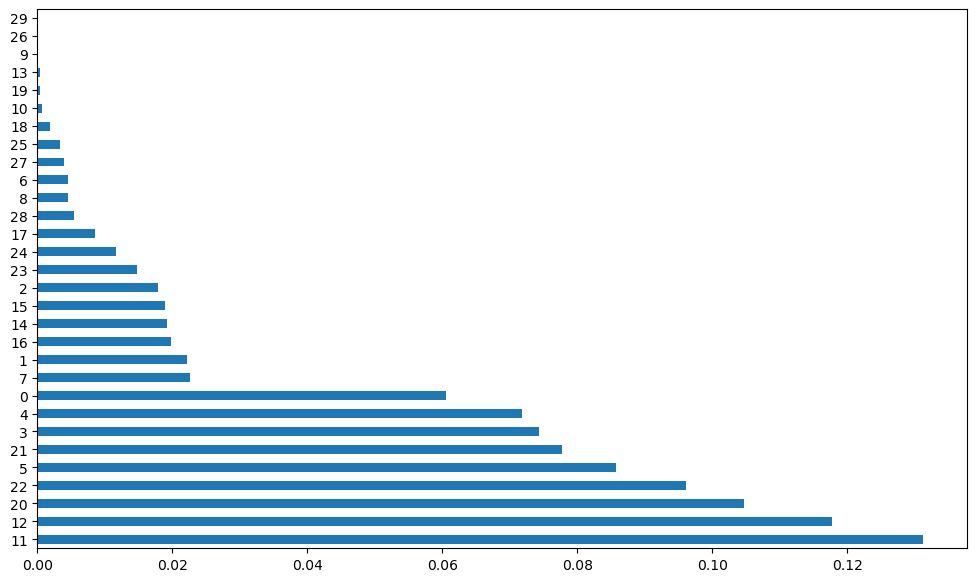

In [53]:
feature_imp(x, rf).plot(kind='barh', figsize=(12,7), legend=False)

### Most important features according to Decision Tree Classifier

<AxesSubplot:>

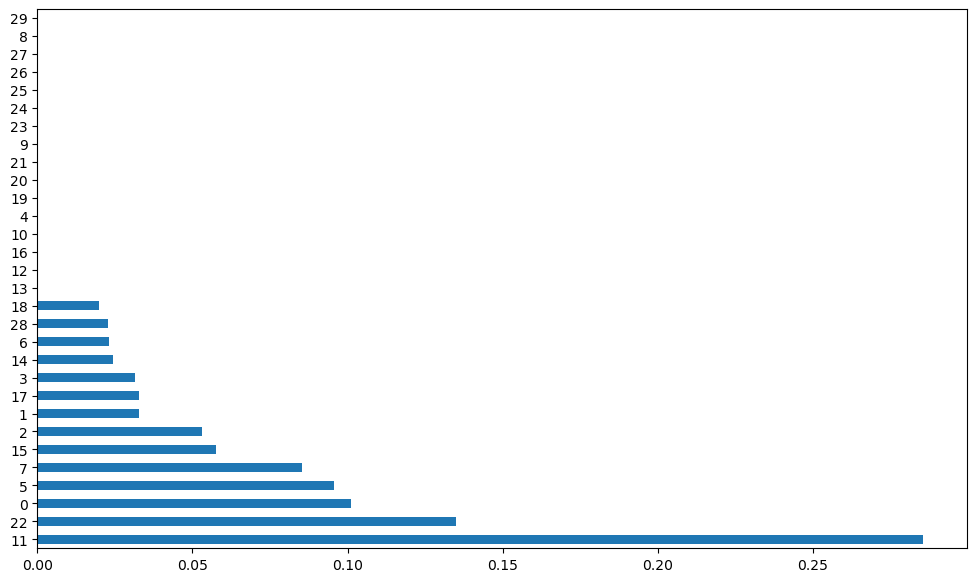

In [54]:
feature_imp(x, dtc).plot(kind='barh', figsize=(12,7), legend=False)

# Conclusion:

After all the testing we can say that the Support Vector Machine is the most efficient and accurate model. Moreover
feature 11 and 12 which are Thalassemia are the most important features. We tried and tested different things in the whole experiment. First off, we noted that lower number of n estimators give higher accuracy. As for SVM random state and accuracy are inversely proportional. One thing that I noted after trying the same code with normalisation instead
of standardisation is that the accuracy was all over the place with normalisation.